In [1]:
#import needed libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Embedding, Input, Flatten
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout, AveragePooling1D, AveragePooling2D
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0
5,82428052,Fried chickens \n\nIs dat sum fried chickens?,0,0,0,0,0,0
6,87311443,Why can you put English for example on some pl...,0,0,0,0,0,0
7,114749757,Guy Fawkes \n\nim a resident in bridgwater and...,0,0,0,0,0,0
8,138560519,as far as nicknames go this article is embarra...,0,0,0,0,0,0
9,139353149,Woodland Meadows\nGood to hear that you correc...,0,0,0,0,0,0


In [4]:
df.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
95841,999912713635,"""\n Please don't bother. I was just wondering....",0,0,0,0,0,0
95842,999939579242,The article The eighth sea has been speedily d...,0,0,0,0,0,0
95843,999945355747,Each alum agrees to how much information can b...,0,0,0,0,0,0
95844,999950278781,"""\n\n Caucasion vs. white \n\nI noticed that t...",0,0,0,0,0,0
95845,999976306590,This culture allows people to hold their wives...,1,0,1,0,0,0
95846,999977655955,"""\nI have discussed it, unlike most of those w...",0,0,0,0,0,0
95847,999982426659,"ps. Almost forgot, Paine don't reply back to t...",1,0,1,0,0,0
95848,999982764066,Mamoun Darkazanli\nFor some reason I am unable...,0,0,0,0,0,0
95849,999986890563,Salafi would be a better term. It is more poli...,0,0,0,0,0,0
95850,999988164717,making wikipedia a better and more inviting pl...,0,0,0,0,0,0


In [2]:
#read the input dataset
df = pd.read_csv("./train.csv")
#split the data into train and test sets
train, test = train_test_split(df, test_size=0.2)

In [11]:
df.shape
#959850 comments

(95851, 8)

In [14]:
x=df.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=df.iloc[:,2:].sum(axis=1)
df['clean']=(rowsums==0)
#count number of clean entries
df['clean'].sum()
print("Total comments = ",len(df))
print("Total clean comments = ",df['clean'].sum())
print("Total tags =",x.sum())

Total comments =  95851
Total clean comments =  86061
Total tags = 21195.0


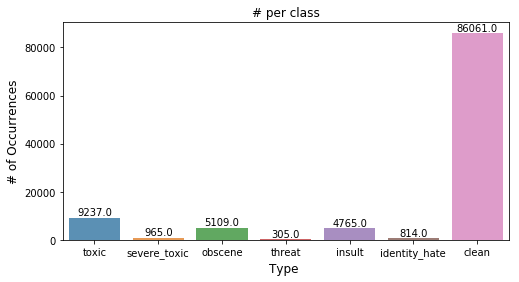

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
x=df.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

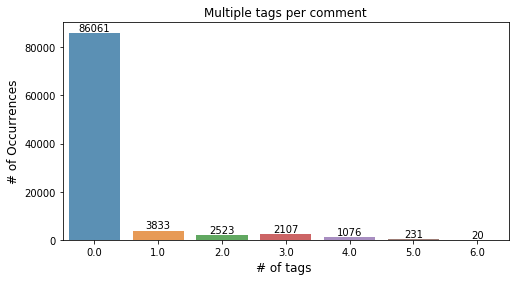

In [24]:

x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

'" May 2008 (UTC)\n\nNotability of Your New Heart\n A tag has been placed on Your New Heart requesting that it be speedily deleted from Wikipedia. This has been done because the article appears to be about a real person, organization (band, club, company, etc.), or web content, but it does not indicate how or why the subject is notable: that is, why an article about that subject should be included in an encyclopedia. Under the criteria for speedy deletion, articles that do not indicate the subject\'s importance or significance may be deleted at any time. Please see the guidelines for what is generally accepted as notable. If this is the first page that you have created, then you should read the guide to writing your first article.\n\nIf you think that you can assert the notability of the subject, you may contest the deletion by adding  to the top of the article (just below the existing speedy deletion or ""db"" tag), coupled with adding a note on the article\'s talk page explaining you

In [43]:
#Unique words
df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))

In [18]:
sum(pd.isnull(df["comment_text"]))

0

In [8]:
df['count_word']=df["comment_text"].apply(lambda x: len(str(x).split()))
df['count_word'].head(20)

0      14
1      29
2      69
3      25
4      49
5       7
6      18
7      64
8      42
9       9
10    290
11     61
12    185
13     49
14    267
15    189
16     38
17     42
18     91
19     47
Name: count_word, dtype: int64

In [13]:
print("average word count", df['count_word'].mean())
print("shortest comment", df['count_word'].min())
print("longest comment", df['count_word'].max())

average word count 67.4236053875
shortest comment 1
longest comment 1403


In [21]:
display(df.head(10))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,count_word
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,14
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,29
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,69
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,25
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,49
5,82428052,Fried chickens \n\nIs dat sum fried chickens?,0,0,0,0,0,0,7
6,87311443,Why can you put English for example on some pl...,0,0,0,0,0,0,18
7,114749757,Guy Fawkes \n\nim a resident in bridgwater and...,0,0,0,0,0,0,64
8,138560519,as far as nicknames go this article is embarra...,0,0,0,0,0,0,42
9,139353149,Woodland Meadows\nGood to hear that you correc...,0,0,0,0,0,0,9


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,count_word
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,14
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,29
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,69
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,25
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,49
5,82428052,Fried chickens \n\nIs dat sum fried chickens?,0,0,0,0,0,0,7
6,87311443,Why can you put English for example on some pl...,0,0,0,0,0,0,18
7,114749757,Guy Fawkes \n\nim a resident in bridgwater and...,0,0,0,0,0,0,64
8,138560519,as far as nicknames go this article is embarra...,0,0,0,0,0,0,42
9,139353149,Woodland Meadows\nGood to hear that you correc...,0,0,0,0,0,0,9
